# **Lab 04: KMeans Clustering**

**Objective:** The objective of this assignment is to deepen your understanding of the K-Means clustering algorithm by implementing it from scratch using object-oriented programming (OOP) principles. You will create a custom KMeans class with methods such as fit, transform, and predict, following the API standards similar to Sklearn. Through this assignment, you will gain insights into the inner workings of the algorithm and its practical applications.

Dataset: https://drive.google.com/file/d/1IqSv-q8bE3Fa5n93ZB7-Jza0DffC3TK4/view?usp=sharing



In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from scipy.spatial import distance
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

## Data Preprocessing

**Description:**
Statistics for a large number of US Colleges from the 1995 issue of US News and
World Report, with 777 observations on the following 18 variables.
1. Private: A factor with levels No and Yes indicating private or public university
2. Apps: Number of applications received
3. Accept: Number of applications accepted
4. Enroll: Number of new students enrolled
5. Top10perc: Pct. new students from the top 10% of H.S. class
6. Top25perc: Pct. new students from the top 25% of H.S. class
7. F.Undergrad: Number of full-time undergraduates
8. P.Undergrad: Number of part-time undergraduates
9. Outstate: Out-of-state tuition
10. Room.Board: Room and board costs
11. Books: Estimated book costs
12. Personal: Estimated personal spending
13. PhD: Pct. of faculty with Ph.D.’s
14. Terminal: Pct. of faculty with a terminal degree
15. S.F.Ratio: Student/faculty ratio
16. perc.alumni: Pct. alumni who donate
17. Expend: Instructional expenditure per student
18. Grad.Rate: Graduation rate


In [241]:
# load the dataset
df = pd.read_csv('/content/College.csv')

df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [243]:
df.isna().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

Mô tả dữ liệu cho thấy:
- Không có missing values
- Unnamed column: Tên của các college
- Categorical variable: Private (Yes, No)
- Numerical variable: Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate

In [244]:
# drop Unnamed: 0 column
df.drop(columns=['Unnamed: 0'], inplace=True)

Bên trên, thực hiện xoá cột 'Unnamed: 0' khỏi dữ liệu vì dữ liệu trong cột này chỉ tương ứng như index của từng dòng records và cho biết tên của university. Do đó, ta có thể loại bỏ.

In [245]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


**Kiểm tra sai sót trong dữ liệu:**

Để ý trong bảng thống kê dữ liệu bên trên, ta thấy max của Grad.Rate = 118.0. Tuy nhiên, Grad.Rate là tỷ lệ phần trăm, do đó việc max lên đến 118 là điều không thể. Vậy nên, có sự sai sót trong dữ liệu.

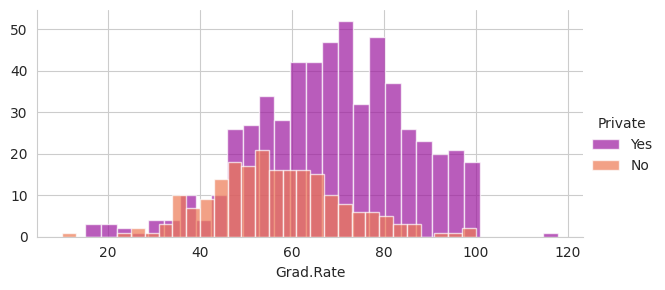

In [246]:
plot = sns.FacetGrid(df, hue = 'Private', aspect = 2, palette='plasma').map(plt.hist, 'Grad.Rate', bins = 30, alpha = 0.7)
plot.add_legend()

In [247]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


Chỉ có một record có Grad.Rate = 118. Do đó, ta có thể tiến hành quy về 100.

In [248]:
df['Grad.Rate'] = df['Grad.Rate'].apply(lambda x: min(x, 100))

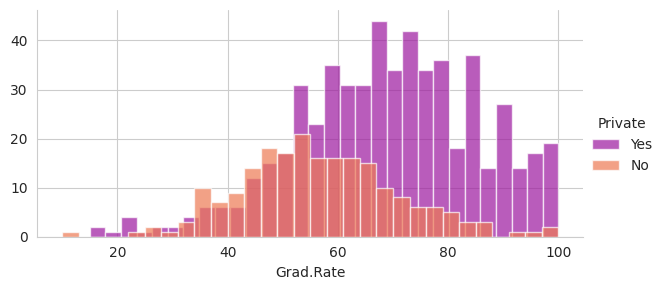

In [249]:
plot = sns.FacetGrid(df, hue = 'Private', aspect = 2, palette='plasma').map(plt.hist, 'Grad.Rate', bins = 30, alpha = 0.7)
plot.add_legend()

Tương tự, max của PhD = 103.0.

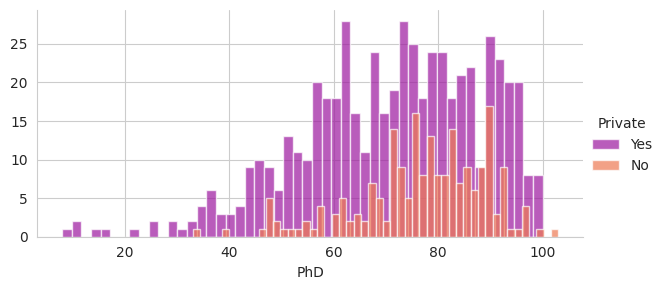

In [250]:
plot = sns.FacetGrid(df, hue = 'Private', aspect = 2, palette='plasma').map(plt.hist, 'PhD', bins = 50, alpha = 0.7)
plot.add_legend()

In [251]:
df[df['PhD'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
582,No,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43


In [252]:
df['PhD'] = df['PhD'].apply(lambda x: min(x, 100))

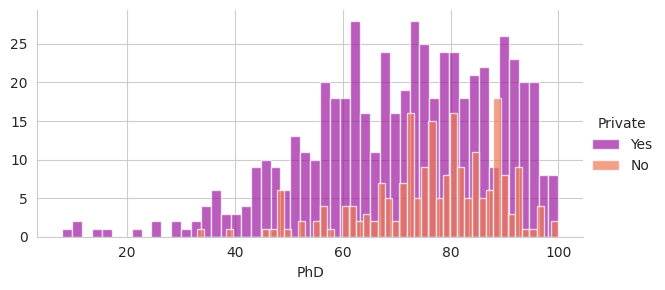

In [253]:
plot = sns.FacetGrid(df, hue = 'Private', aspect = 2, palette='plasma').map(plt.hist, 'PhD', bins = 50, alpha = 0.7)
plot.add_legend()

Như vậy, tệp dữ liệu đã được xử lý xong các giá trị sai lệch. Tiếp đến, ta encode cột 'Private'.

In [254]:
df['Private'].value_counts()

Private
Yes    565
No     212
Name: count, dtype: int64

Encode Categorical Variable:

**Yes:** Private University - 1

**No:** Public University - 0

In [255]:
# map to integer integer value.
df['Private']=df['Private'].map({'Yes':1,"No":0})

Scaled numerical variables:

In [256]:
numerical_data = df.drop(columns=['Private'])

sc = StandardScaler()
data = pd.DataFrame(sc.fit_transform(numerical_data), columns = numerical_data.columns)
data['Private'] = df['Private']

**Data Preprocessed:**

In [257]:
data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.162859,-0.115729,1.013776,-0.867574,-0.501910,-0.317993,1
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.676529,-3.378176,-0.477704,-0.544572,0.166110,-0.551805,1
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.205112,-0.931341,-0.300749,0.585935,-0.177290,-0.668710,1
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185939,1.175657,-1.615274,1.151188,1.792851,-0.376446,1
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204995,-0.523535,-0.553542,-1.675079,0.241803,-2.948375,1


In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    float64
 1   Accept       777 non-null    float64
 2   Enroll       777 non-null    float64
 3   Top10perc    777 non-null    float64
 4   Top25perc    777 non-null    float64
 5   F.Undergrad  777 non-null    float64
 6   P.Undergrad  777 non-null    float64
 7   Outstate     777 non-null    float64
 8   Room.Board   777 non-null    float64
 9   Books        777 non-null    float64
 10  Personal     777 non-null    float64
 11  PhD          777 non-null    float64
 12  Terminal     777 non-null    float64
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    float64
 15  Expend       777 non-null    float64
 16  Grad.Rate    777 non-null    float64
 17  Private      777 non-null    int64  
dtypes: float64(17), int64(1)
memory usage: 109.4 KB


## KMeans clustering algorithm:
Implement the KMeans clustering algorithm **from scratch** using **Numpy**, not using Sklearn (just for the Testing and Validation step):

* Define a Python class named KMeans such as
 * **Parameters:**
    * the number of clusters (K)
    * convergence tolerance
    * maximum number of iterations.
 * **Attributes:**
   * *cluster_centers_*: Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.
   * *labels_*: Labels of each point
   * *n_iter_*:  Number of iterations run
   * *inertia_*: Sum of squared distances of samples to their closest cluster center
 * **Methods:**
   * **fit**: method to train the K-Means model on the input data.
   * **transform**: method to transform input data to a cluster-distance space.
   * **predict**: method to predict cluster labels for new data points.
   * **fit_transform**: method to compute clustering and transform X to cluster-distance space. (Equivalent to fit(X).transform(X), but more efficiently implemented).
   * **fit-predict**: method to compute cluster centers and predict cluster index for each sample. (Convenience method; equivalent to calling fit(X) followed by predict(X)).

---

K-Means Clustering Algorithm

1. **Determine K-clusters.**

2. **Init K-centroids:** Select k centroids randomly.
3. **Calculate distances of data point to centroid:**
    * Use euclidean distances to compute distance between centroid with data point.
    * Return distance matrix **by rows**, matrix shape (p, c):
      * p: number of data points.
      * c: number of centroids.
      * value: distance of each data point with each centroid.
4. **Assign label of data points:**
    * Select index that has min values **by rows** of distance matrix.
    * This index is the label cluster of data point.
5. **Update centroids:**
    * Calculate **mean** of data points in each clusters.
6. **Calculate WCVs (Within Cluster Variance):**
    * WCV: the squares of the distance between each data point and the centroid of the cluster it belongs to.
    * WCVs: the sum of all WCV.
7. **Check convergence:**
    * Convert algorithm when labels of data points do not change anymore (current labels == previous labels) or exceed the limit (tolerance, max_iteration)

In [259]:
class KMeans:
    # constructor
    def __init__(self, n_clusters=5, tol=1e-4, max_iter=300):
        """
          Attributes:
          -- X: input data
          -- cluster_centers_: Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.
          -- labels_: Labels of each point
          -- n_iter_: Number of iterations run
          -- inertia_: Sum of squared distances of samples to their closest cluster center
        """
        self.n_clusters = n_clusters # n_clusters = K
        self.tol = tol
        self.max_iter = max_iter
        # self.cluster_centers_ = None
        # self.labels_ = None
        self.n_iter_ = 0
        self.inertia_ = 0

    # method
    # to train the K-Means model on the input data
    def fit(self, X):
        # convert input data to array
        if type(X) != np.ndarray:
            X = X.to_numpy()
        # N: X_rows, p: X_cols
        self.X = X
        N, p = self.X.shape

        # init random K-centroids
        self.cluster_centers_ = self._init_centroids(self.X, N, self.n_clusters)
        # init labels
        pre_labels = np.zeros((N, 1))

        prev_inertia = 0
        # training
        while True:
            # calculate distances of data point to centroid
            distances = self._calc_dists(self.X, self.cluster_centers_) # shape: (N, K)
            # assign new labels
            self.labels_ = self._assign_labels(distances)
            # check convergece
            if self.n_iter_ >= self.max_iter:
                break
            if self.n_iter_ > 0 and np.abs(self.inertia_ - prev_inertia) < self.tol:
                break
            if self._has_convert(pre_labels,self.labels_):
                break
            # update centroids
            self.labels_ = self._update_centroids(self.X, self.labels_)
            pre_labels = self.labels_
            # calculate WCVs
            self.inertia_ = self._calc_WCVs(self.X, self.cluster_centers_, self.labels_)
            pre_intertia = self.inertia_

            self.n_iter_ += 1

        # calculate WCVs
        self.inertia_ = self._calc_WCVs(self.X, self.cluster_centers_, self.labels_)

    def _init_centroids(self, X, N, n_clusters):
        # create indies_list from 0 to N-1
        ids = np.arange(N)
        # shuffle randomly ids
        np.random.shuffle(ids)
        # pick the first n_clusters indies
        centroids = self.X[ids[:n_clusters]]
        return centroids

    def _calc_dists(self, X, centroids):
        return distance.cdist(X, centroids, 'euclidean')

    def _assign_labels(self, distances):
        return np.argmin(distances, axis=1) # .argmin(): to find the index of the smallest value in each row

    def _update_centroids(self, X, labels):
        new_centroids = []
        for k in range(self.n_clusters):
            X_cluster = X[labels==k]
            new_centroids.append(X_cluster.mean(axis=0)) # mean by columns
        return new_centroids

    def _calc_WCVs(self, X, centroids, labels):
        return np.sum([np.sum(np.linalg.norm(X[labels==k] - centroids[k], axis=1)**2)\
                      for k in range(self.n_clusters)]) # .linalg.norm(): to compute the magnitude of vector

    def _has_convert(self, prev_labels, cur_labels):
        return (cur_labels == prev_labels).all() # .all(): to eturns False if there are any false comparisons and vice versa


    # to transform input data to a cluster-distance space
    def transform(self, X):
        """
        Convert input data into inter-cluster distance space.

        Parameters:
          X : array-like, shape (N, p)
              input data
        Returns:
        distances : array-like, shape (N, K)
            The matrix of the distance between each data point and the centroids.
        """
        distances = self._calc_dists(X, self.cluster_centers_)
        return distances

    # to predict cluster labels for new data points
    def predict(self, X_test):
        """
        Predict labels for data points in the test dataset.

        Parameters:
        X_test : array-like, shape (N, p)
            Test data for label prediction.

        Returns:
        test_labels : array-like, shape (N,)
            A label is predicted for each data point in the test data set.
        """
        if type(X_test) != np.ndarray:
            X_test = X_test.to_numpy()
        distances_test = self._calc_dists(X_test, self.cluster_centers_)
        test_labels = self._assign_labels(distances_test)
        return test_labels

    # to compute clustering and transform X to cluster-distance space
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    # to compute cluster centers and predict cluster index for each sample.
    def fit_predict(self, X, X_test):
        self.fit(X)
        return self.predict(X_test)

## Testing and Validation:
* Test your custom KMeans class implementation on the provided dataset.
Validate the correctness of your implementation by comparing results with sklearn's KMeans implementation.

* Experiment with different values of K (number of clusters) and choose an optimal value based on appropriate evaluation metrics (e.g., silhouette score, elbow method).

* Compare the results of your K-means and the Sklearn K-means with the Private attribute in the dataset (ground truth).


In [260]:
X = data.drop(columns = ['Private'])
y = data['Private']

In [261]:
X.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.162859,-0.115729,1.013776,-0.867574,-0.501910,-0.317993
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.676529,-3.378176,-0.477704,-0.544572,0.166110,-0.551805
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.205112,-0.931341,-0.300749,0.585935,-0.177290,-0.668710
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185939,1.175657,-1.615274,1.151188,1.792851,-0.376446
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204995,-0.523535,-0.553542,-1.675079,0.241803,-2.948375


**Implement Kmeans:**

In [297]:
# set n_clusters
K = 5

In [298]:
# Test my custom KMeans class
my_kmeans = KMeans(n_clusters=K, tol=0.00001, max_iter=300)
my_kmeans.fit_transform(X)

array([[ 3.39697102,  6.75636753,  2.51178555,  2.30234546,  7.15186424],
       [ 5.7703628 ,  8.07776531,  6.3054758 ,  4.39491434,  9.13313687],
       [ 2.80562227,  6.04822034,  4.29448949,  1.70900151,  8.07080928],
       ...,
       [ 2.57170305,  5.65439741,  3.29339818,  2.20280472,  7.00703444],
       [ 8.73726108,  5.1830815 , 10.68620422, 10.98234537,  9.90647496],
       [ 3.34805787,  6.26464071,  3.75789153,  3.63821905,  6.99567225]])

In [299]:
# KMeans from sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=K)
kmeans.fit_transform(X)

array([[ 6.87904331,  6.78713947,  2.46132369,  2.30234546,  3.39697102],
       [ 8.94816667,  8.08744787,  6.27767154,  4.39491434,  5.7703628 ],
       [ 7.82479784,  6.06261552,  4.25738469,  1.70900151,  2.80562227],
       ...,
       [ 6.74384317,  5.68907303,  3.26333363,  2.20280472,  2.57170305],
       [ 9.86892272,  5.16795417, 10.70275545, 10.98234537,  8.73726108],
       [ 6.71536807,  6.30022632,  3.76351459,  3.63821905,  3.34805787]])

In [300]:
my_kmeans.cluster_centers_

array([[-0.31273651, -0.27729572, -0.35397533,  0.17873242,  0.27014625,
        -0.38618941, -0.29688654,  0.4900875 ,  0.40965963, -0.09502517,
        -0.33340978,  0.34311335,  0.37209949, -0.25448325,  0.42321488,
         0.06033768,  0.49483357],
       [ 0.5029021 ,  0.1333233 ,  0.01409804,  1.94858926,  1.57461797,
        -0.12346495, -0.4139205 ,  1.76910926,  1.20259962,  0.30717232,
        -0.48138042,  1.14585196,  1.09636107, -1.18941485,  1.35099394,
         2.08213562,  1.13883378],
       [ 0.48437218,  0.55790178,  0.79419634, -0.46297919, -0.27325263,
         0.9231115 ,  0.96680092, -0.92740241, -0.57805513,  0.10417813,
         0.81496178,  0.30126491,  0.3302739 ,  0.9040929 , -0.81485279,
        -0.48730508, -0.72957881],
       [-0.52061938, -0.51243504, -0.50289037, -0.63140527, -0.72769708,
        -0.48438133, -0.26950465, -0.52632432, -0.51303121, -0.09790471,
         0.00804464, -0.94574577, -0.96848268,  0.12185729, -0.37556652,
        -0.47495802

In [301]:
kmeans.cluster_centers_

array([[ 2.72135768,  2.89416379,  2.87756896,  0.59923336,  0.75887483,
         2.85321381,  1.41617373, -0.36279422,  0.09217657,  0.3197709 ,
         0.52464049,  0.83560146,  0.79420556,  0.53192097, -0.39295903,
         0.12675153,  0.08282712],
       [ 0.4931971 ,  0.12175675, -0.00664218,  1.92863267,  1.56671864,
        -0.13800395, -0.41757782,  1.80484961,  1.21726422,  0.29182899,
        -0.48424173,  1.14533136,  1.09974474, -1.22196736,  1.35778365,
         2.10516748,  1.15016232],
       [ 0.44101783,  0.51400936,  0.75719266, -0.47336088, -0.28769611,
         0.88425298,  0.97378345, -0.93579871, -0.58803764,  0.11434555,
         0.83563088,  0.29355203,  0.32751333,  0.87765648, -0.82409315,
        -0.48320084, -0.76313443],
       [-0.52061938, -0.51243504, -0.50289037, -0.63140527, -0.72769708,
        -0.48438133, -0.26950465, -0.52632432, -0.51303121, -0.09790471,
         0.00804464, -0.94574577, -0.96848268,  0.12185729, -0.37556652,
        -0.47495802

In [302]:
my_kmeans.inertia_

6844.056116716518

In [303]:
kmeans.inertia_

6844.034316754727

**ARI** - Adjusted Rand Score: sử dụng các giá trị trong ma trận đối chiếu để đo độ tương đồng giữa các phân cụm. Nó so sánh cả hai phân cụm dựa trên sự tương tự giữa các cặp mẫu trong chúng.

**Kết quả:**

* ARI càng gần 1 thì đồng nghĩa với việc KMeans phân cụm tốt, tương tự như ground truth.
* Một kết quả gần 0 hoặc âm cho thấy rằng phân cụm từ KMeans không tương đồng hoặc đối lập với ground truth.

Cụ thể, ARI so sánh sự tương tự giữa các cặp mẫu theo cách mà chúng được gán nhãn bởi Custom KMeans và Sklearn KMeans. Kết quả cuối cùng là một giá trị ARI trong khoảng [-1, 1], trong đó 1 tương ứng với một phân cụm hoàn hảo, 0 tương ứng với một phân cụm ngẫu nhiên và các giá trị âm tương ứng với sự không tương đồng giữa các phân cụm.

In [304]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand = adjusted_rand_score(my_kmeans.labels_, kmeans.labels_)
print("ARI:", adjusted_rand)

ARI: 0.9935627462464492


Như vậy, hai thuật toán Custom KMeans và Sklearn KMeans phân cụm tương đồng nhau.

**Cùng trực quan để thấy rõ hơn:**

In [305]:
from sklearn.decomposition import PCA
pca = PCA(n_components=K)
X_pca = pca.fit_transform(X)

print('Explained variance ratio of the chosen components:\n', np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio of the chosen components:
 [0.32046058 0.58388974 0.65290088 0.7119636  0.76685387]


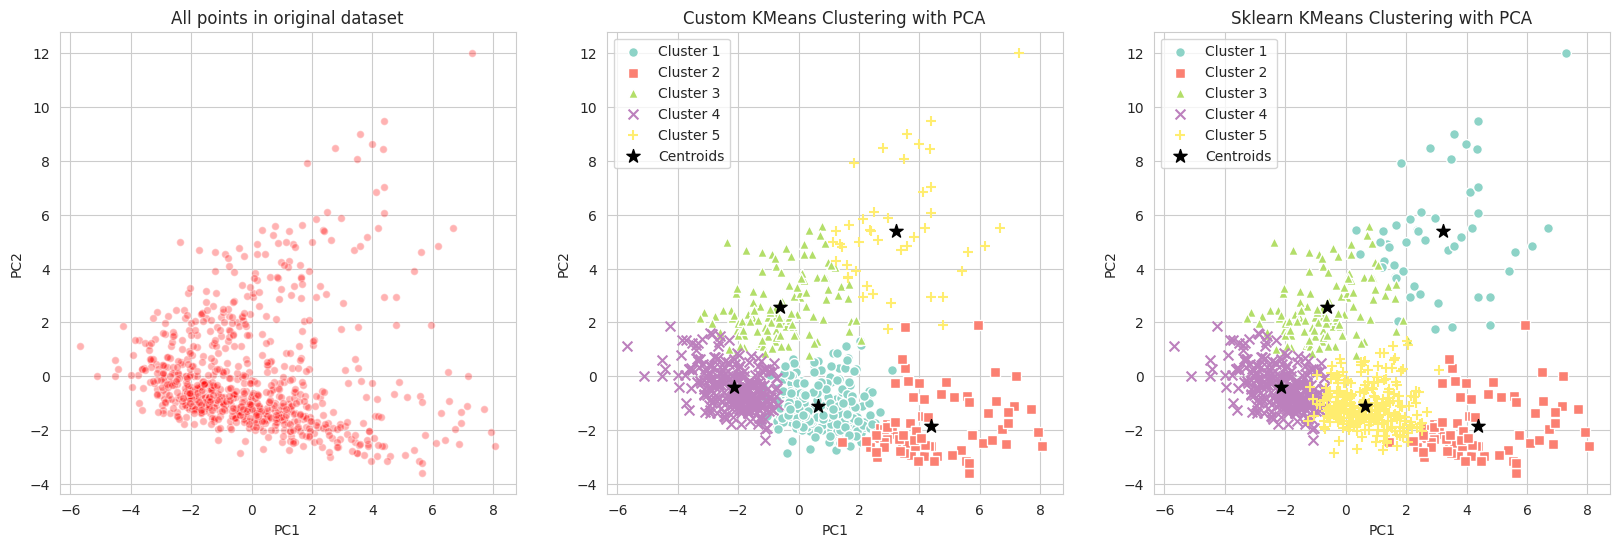

In [306]:
# 2-D visualize by PCA
def display_by_PCA(ax, X_pca, labels, centroids_pca, n_clusters):
    # Initialize color map
    cmap = plt.get_cmap('Set3')
    colors = cmap(np.linspace(0, 1, n_clusters))

    markers = ["o", "s", "^", "x", "+"]

    for k in range(len(np.unique(labels))):
        # Plot data points for each cluster
        ax.scatter(X_pca[labels == k, 0], X_pca[labels == k, 1], color=colors[k], marker=markers[k], label=f'Cluster {k+1}', s=50, edgecolors='white')

    ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*', color='black', s=100, label='Centroids')

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.legend()
    ax.set_title('KMeans Clustering with PCA')


fig, axes = plt.subplots(1, 3, figsize=(20, 6))
# Before using KMeans
axes[0].scatter(X_pca[:,0], X_pca[:,1], color='r', s=30, edgecolors='white', alpha=0.3)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('All points in original dataset')

#After using KMeans
my_centroids_pca = pca.transform(my_kmeans.cluster_centers_)
display_by_PCA(axes[1], X_pca, my_kmeans.labels_, my_centroids_pca, K)
axes[1].set_title('Custom KMeans Clustering with PCA')

centroids_pca = pca.transform(my_kmeans.cluster_centers_)
display_by_PCA(axes[2], X_pca, kmeans.labels_, centroids_pca,K)
axes[2].set_title('Sklearn KMeans Clustering with PCA')

plt.show()

**Nhận xét:**

* Quan sát cluster_centrers_: Sự phân bố các tâm cụm của 2 thuật toán giữa KMeans class custom và KMeans class sklearn đều giống nhau.
* Quan sát các clusters:
  * Sự phân bố của các cụm giống hệt nhau.
  * Mặc dù, ở đây có sự đảo vị trí giữa các cụm nhưng điều này là tất nhiên do tính random centroids trong thuật toán mà label của các tâm cụm không cố định và bị thay đổi sau mỗi lần chạy. Vì vậy, chỉ cần chúng có phân bố tương tự nhau. Việc xác định cụm có label như nào còn phụ thuộc vào việc get insights sau khi phân cụm.
* Quan sát inertia_, tương ứng với WCVs của 2 thuật toán đều xấp xỉ giống nhau.

**Kết luận:** thuật toán KMeans Clustering Custom đúng.

---

**Experiment with different values of K (number of clusters):**



**Silhouette scores:**

Điểm Silhouette là một chỉ số đánh giá chất lượng của việc phân cụm dữ liệu sử dụng K-means. Nó đo lường mức độ dữ liệu trong cùng một cụm gắn kết chặt chẽ với nhau so với dữ liệu trong các cụm khác.


**Cách Tính Toán:**
Điểm Silhouette được tính cho từng điểm dữ liệu và sau đó lấy trung bình. Nó xem xét hai khoảng cách cho mỗi điểm dữ liệu:

  * a: Khoảng cách trung bình giữa điểm dữ liệu và tất cả các điểm khác trong cùng một cụm (khoảng cách nội cụm).
  * b: Khoảng cách giữa điểm dữ liệu và cụm gần nhất mà điểm đó không thuộc về (khoảng cách ngoại cụm).
  * Điểm Silhouette cho một điểm dữ liệu được tính như sau:
  Silhouette Score = (b-a)/max(a,b)

**Ý Nghĩa:** Điểm Silhouette có giá trị từ -1 đến 1:

  * 1: Các điểm dữ liệu gần nhau trong cụm và xa các cụm khác (phân cụm tốt).
  * 0: Các điểm dữ liệu nằm trên ranh giới giữa các cụm (phân cụm trung bình).
  * -1: Các điểm dữ liệu có thể đã bị gán sai cụm (phân cụm kém).

**Sử Dụng Điểm Silhouette:**
Điểm Silhouette giúp xác định số cụm (k) tối ưu cho K-means. Bằng cách tính điểm Silhouette cho các giá trị k khác nhau và chọn k có điểm Silhouette trung bình cao nhất, từ đó có thể tìm được cách phân cụm tốt nhất.

In [272]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2,17):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    print(f'Silhouette score for {k} clusters: {score:.3f}')

Silhouette score for 2 clusters: 0.229
Silhouette score for 3 clusters: 0.241
Silhouette score for 4 clusters: 0.182
Silhouette score for 5 clusters: 0.179
Silhouette score for 6 clusters: 0.171
Silhouette score for 7 clusters: 0.142
Silhouette score for 8 clusters: 0.141
Silhouette score for 9 clusters: 0.145
Silhouette score for 10 clusters: 0.126
Silhouette score for 11 clusters: 0.125
Silhouette score for 12 clusters: 0.126
Silhouette score for 13 clusters: 0.128
Silhouette score for 14 clusters: 0.114
Silhouette score for 15 clusters: 0.112
Silhouette score for 16 clusters: 0.108


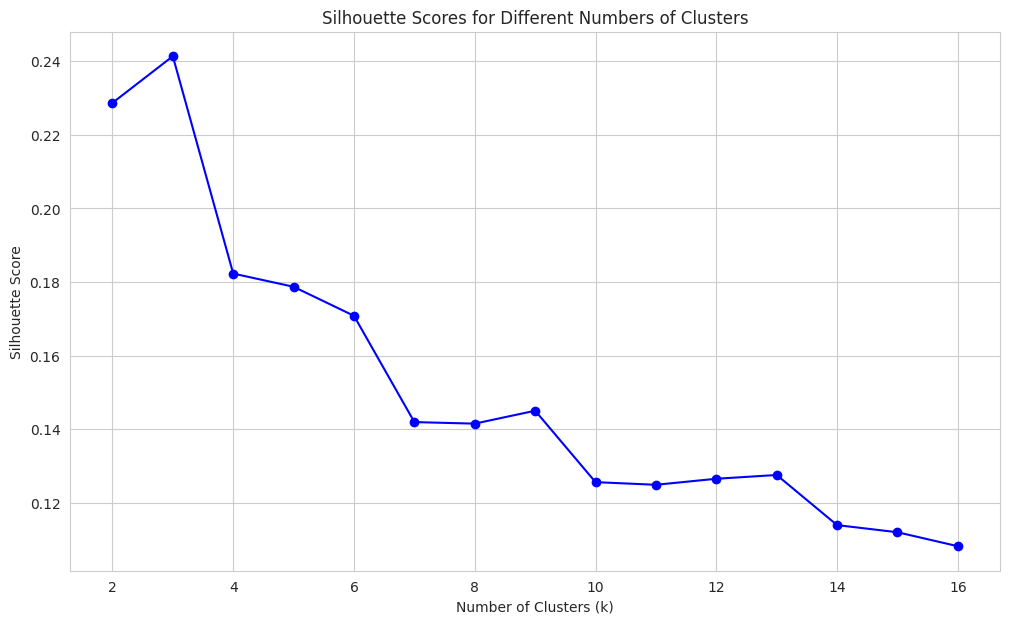

In [273]:
plt.figure(figsize=(12, 7))
plt.plot(range(2, 17), silhouette_scores, marker='o', color='blue')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Rõ ràng, việc phân loại thành **3** cụm sẽ mang lại silhouette score tốt nhất.

Điều này có nghĩa là, mặc dù biết rằng dữ liệu trong tập dữ liệu chỉ có **2** phân loại *Private* và *Public*, nhưng **có thể và có lẽ chính xác hơn** nên phân loại chúng thành **3** nhóm.

**Elbow method:**

In [274]:
def elbow_method(n_clusters_arr, X):
    total_wcss = []
    for k in n_clusters_arr:
        kmeans_model = KMeans(n_clusters=k)
        kmeans_model.fit(X)
        total_wcss.append(kmeans_model.inertia_)

    plt.figure(figsize=(12,7))
    plt.plot(n_clusters_arr, total_wcss, marker='o', color='r')
    plt.ylabel('Total WSS')
    plt.xlabel('Number of cluster')
    plt.show()

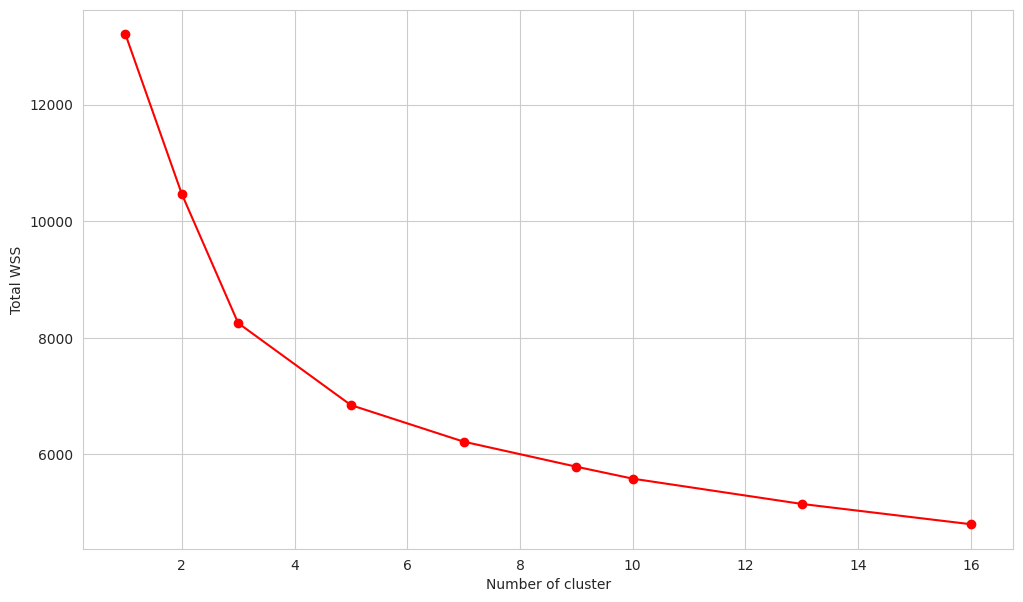

In [275]:
K_CLUSTERS = [1, 2, 3, 5, 7, 9, 10, 13, 16]
elbow_method(K_CLUSTERS, X)

Elbow curve cũng cho ra kết quả điểm elbow là 3. Ta trực quan khi phân cụm thành 3 nhóm:

In [276]:
K_CLUSTERS_BEST = 3
kmeans_best = KMeans(n_clusters=K_CLUSTERS_BEST)
labels = kmeans_best.fit_predict(X)

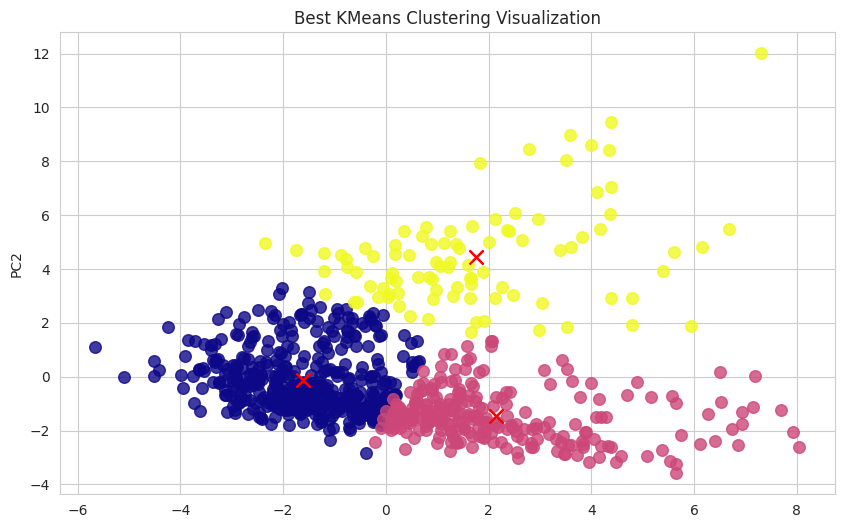

In [277]:
# 2D visualization
plt.figure(figsize=(10,6))
for k in range(K_CLUSTERS_BEST):
    cmap = plt.get_cmap('plasma')
    colors = cmap(np.linspace(0, 1, K_CLUSTERS_BEST))
    plt.scatter(X_pca[labels == k, :][:, 0], X_pca[labels == k, :][:, 1], color=colors[k], s=70, alpha=0.8)
    centroids_pca = pca.transform(kmeans_best.cluster_centers_)
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.ylabel('PC2')
plt.title('Best KMeans Clustering Visualization')
plt.show()

In [278]:
# 3D visualization
import plotly.express as px # package for 3D visualization
# scatter with predicted clusters
fig = px.scatter_3d(X_pca,
                    x=X_pca[:,0],
                    y=X_pca[:,1],
                    z=X_pca[:,2],
                    color=kmeans_best.labels_,
                    width=800,
                    height=400)
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Với 3 cụm, phân bố của các data points theo cụm được phân tách rõ ràng. Có thể nhận thấy rằng có một vài điểm màu xanh bị lẫn sang phần cluster màu vàng. Nhưng việc phân cụm đã được thục hiện khá tốt rồi.




---

**Compare the results of your K-means and the Sklearn K-means with the Private attribute in the dataset (ground truth):**

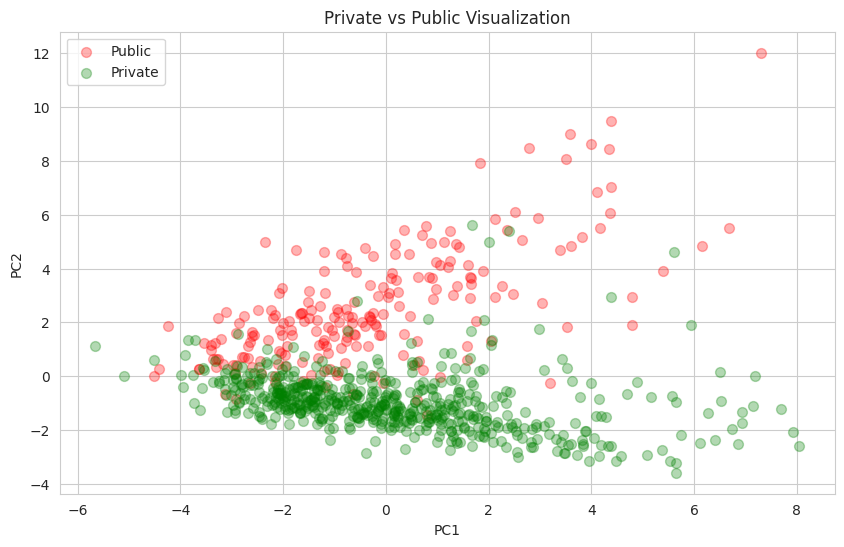

In [279]:
# visualize data points of Private label & Public label
plt.figure(figsize=(10,6))
plt.scatter(X_pca[y == 0, :][:, 0], X_pca[y == 0, :][:, 1], color='r', s=50, label='Public', alpha=0.3)
plt.scatter(X_pca[y == 1, :][:, 0], X_pca[y == 1, :][:, 1], color='g', s=50, label='Private', alpha=0.3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Private vs Public Visualization')
plt.legend()
plt.show()

Rõ ràng có thể thấy, với nhãn dữ liệu được cho trước, các điểm đề cập đến Private Uni (màu xanh) và các điểm đề cập đến Public Uni (màu đỏ) được phân ra thành 2 cụm. Do đó, có thể xác minh rằng các features còn lại có thể dùng để phân biệt Private Uni và Public Uni.

Chúng ta phải kiểm tra liệu thuật toán KMeans có thực hiện tốt việc phân thành 2 cụm rõ ràng như thế dựa vào các features còn lại khi không có nhãn, như sau:

In [280]:
kmeans2 = KMeans(n_clusters=2, random_state=0)
kmeans2_labels = kmeans2.fit_predict(X)

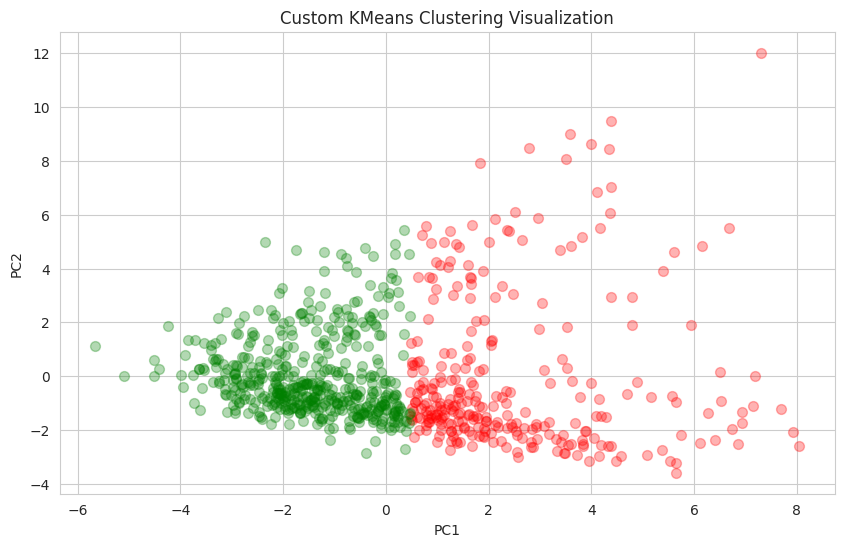

In [343]:
# visualize data points followed cluster
plt.figure(figsize=(10,6))
for k in range(2):
    colors = ['r','g']
    plt.scatter(X_pca[kmeans2_labels == k, :][:, 0], X_pca[kmeans2_labels == k, :][:, 1], color=colors[k], s=50, alpha=0.3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Custom KMeans Clustering Visualization')

plt.show()

**Nhận xét:**
Với biểu đồ trên, ta có thể thấy các điểm dữ liệu được chia thành 2 cụm khá rõ rệt.

---

Chúng ta cùng xem xét mức độ phân cụm và so sánh với labels thực tế qua 2 chỉ số sau:

* silhouette score: đánh giá chất lượng của việc phân cụm dữ liệu sử dụng K-means
* ARI (Adjusted Rand Score): đánh giá độ tương đồng của phân cụm bằng KMeans và phân cụm bằng

In [282]:
silhouette_score(X, kmeans2.labels_)

0.22869745953305615

* silhouette score nằm trong khoảng (0,1) cho thấy kmeans thực hiện phân cụm có hiệu quả. Hai cụm được phân riêng biệt nhưng chưa tách rời xa hẳn nhau.

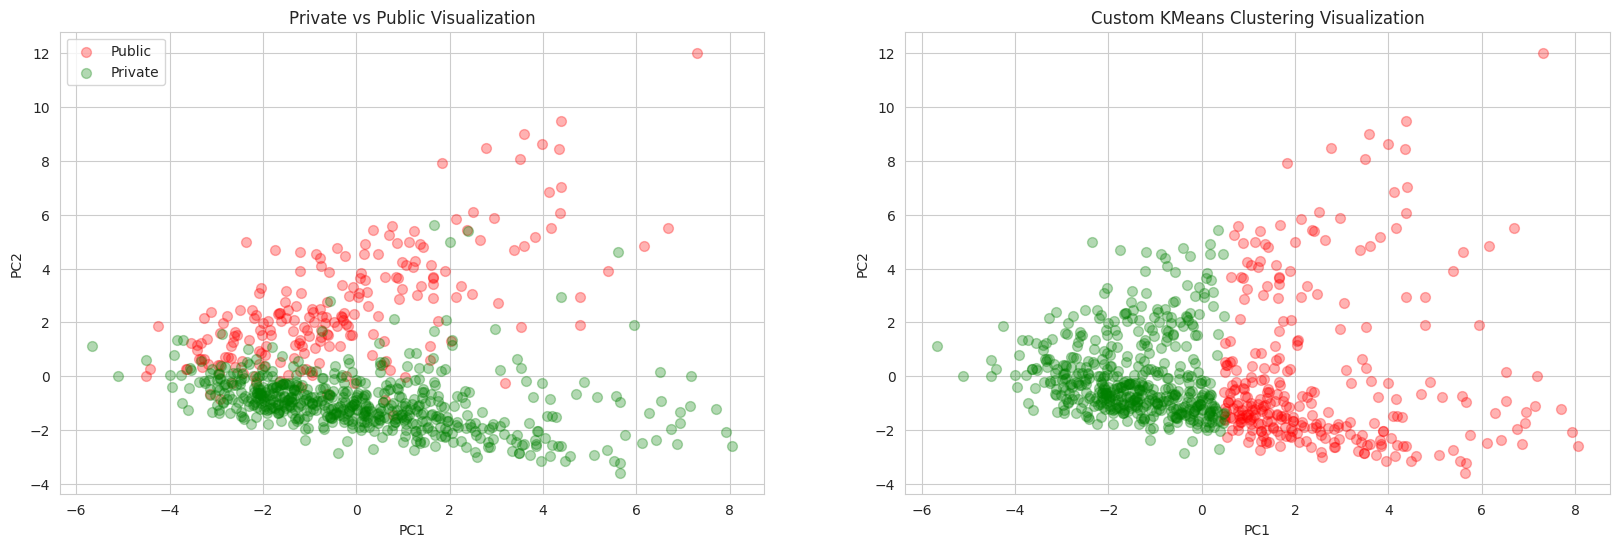

In [283]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# visualize data points of Private label & Public label
axes[0].scatter(X_pca[y == 0, :][:, 0], X_pca[y == 0, :][:, 1], color='r', s=50, label='Public', alpha=0.3)
axes[0].scatter(X_pca[y == 1, :][:, 0], X_pca[y == 1, :][:, 1], color='g', s=50, label='Private', alpha=0.3)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend()
axes[0].set_title('Private vs Public Visualization')

# visualize data points followed cluster
for k in range(2):
    colors = ['r','g']
    axes[1].scatter(X_pca[kmeans2_labels == k, :][:, 0], X_pca[kmeans2_labels == k, :][:, 1], color=colors[k], s=50, alpha=0.3)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Custom KMeans Clustering Visualization')

plt.show()

**Nhận xét:**

 Dù KMeans đã thực sự hoạt động tốt khi chia dữ liệu thành 2 cụm riêng biệt, sự phân bố của 2 cụm khi so sánh giữa 2 biểu đồ mà nói thì có chút khác biệt.

**Giải thích:**

Sự phân bố có phần khác biệt giữa dùng thuật toán và thực tế là vì:

* Hạn chế của KMeans rằng KMeans giả định rằng các cụm là hình cầu và có kích thước tương đồng. Do đó, với dữ liệu gốc có phân bố trải dài, thuật toán KMeans sẽ hoạt động kém hiệu quả.

* KMeans hoạt động bằng cách tối thiểu hóa tổng bình phương khoảng cách từ các điểm dữ liệu đến các centroid (trung tâm cụm). Khoảng cách này thường được tính bằng khoảng cách Euclid, vốn phụ thuộc mạnh vào độ lớn của giá trị dữ liệu. Việc chuẩn hóa hoặc tiêu chuẩn hóa dữ liệu là rất quan trọng để đảm bảo tất cả các đặc trưng đều có ảnh hưởng tương đồng trong quá trình phân cụm. Điều này giúp đạt được kết quả phân cụm chính xác và đáng tin cậy hơn.

* KMeans nhạy cảm với outliers, do đó, cần sử dụng các hiệu chỉnh của kmeans để cho ra kết quả phân cụm tốt hơn (ví dụ như: Sử dụng các hàm mất mát tốt hơn - robust loss functions)

**Kết luận:**

Có nghĩa là mặc dù không có sẵn trước các nhãn, việc dựa vào các features có thể chia các trường đại học thành 2 nhóm riêng biệt. Nhưng có lẽ việc chia các trường đại học thành Private và Public dựa trên các features còn lại vẫn còn chưa thật sự đúng đắn. Ta có thể xem xét chia các trường đại học thành 3 nhóm theo tiêu chí khác (chẳng hạn như 'Khu vực') trong trường hợp này.

Tuy nhiên, dữ liệu đã được chia rõ ràng. Điều này chứng tỏ KMeans hoạt động khá tốt.


## Analysis and Interpretation:
Visualize the clusters using appropriate plots (e.g., scatter plots) to gain insights into the data distribution and cluster separability.

In [324]:
# 2-D visualize by data feature
def display_by_feature(ax, X, kmeans, x, y):
    xlabel = X.columns[x]
    ylabel = X.columns[y]
    # check X type
    if type(X) != np.ndarray:
            X = X.to_numpy()

    # init attribute
    n_clusters = kmeans.n_clusters
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # init color random
    cmap = plt.get_cmap('Set3')
    colors = cmap(np.linspace(0.25, 0.75, n_clusters))
    for k in range(n_clusters):
        # show data point followed cluster
        ax.scatter(X[labels == k,:][:,x], X[labels == k,:][:,y], color=colors[k], label=f'{k+1}', s=50, alpha=0.7)
    if centroids is not None:
      for k in range(n_clusters):
          # show cluster_centers_
          ax.scatter(centroids[k,x], centroids[k,y], color='r', marker='*', s=100)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.set_title(f'{xlabel} vs {ylabel}')

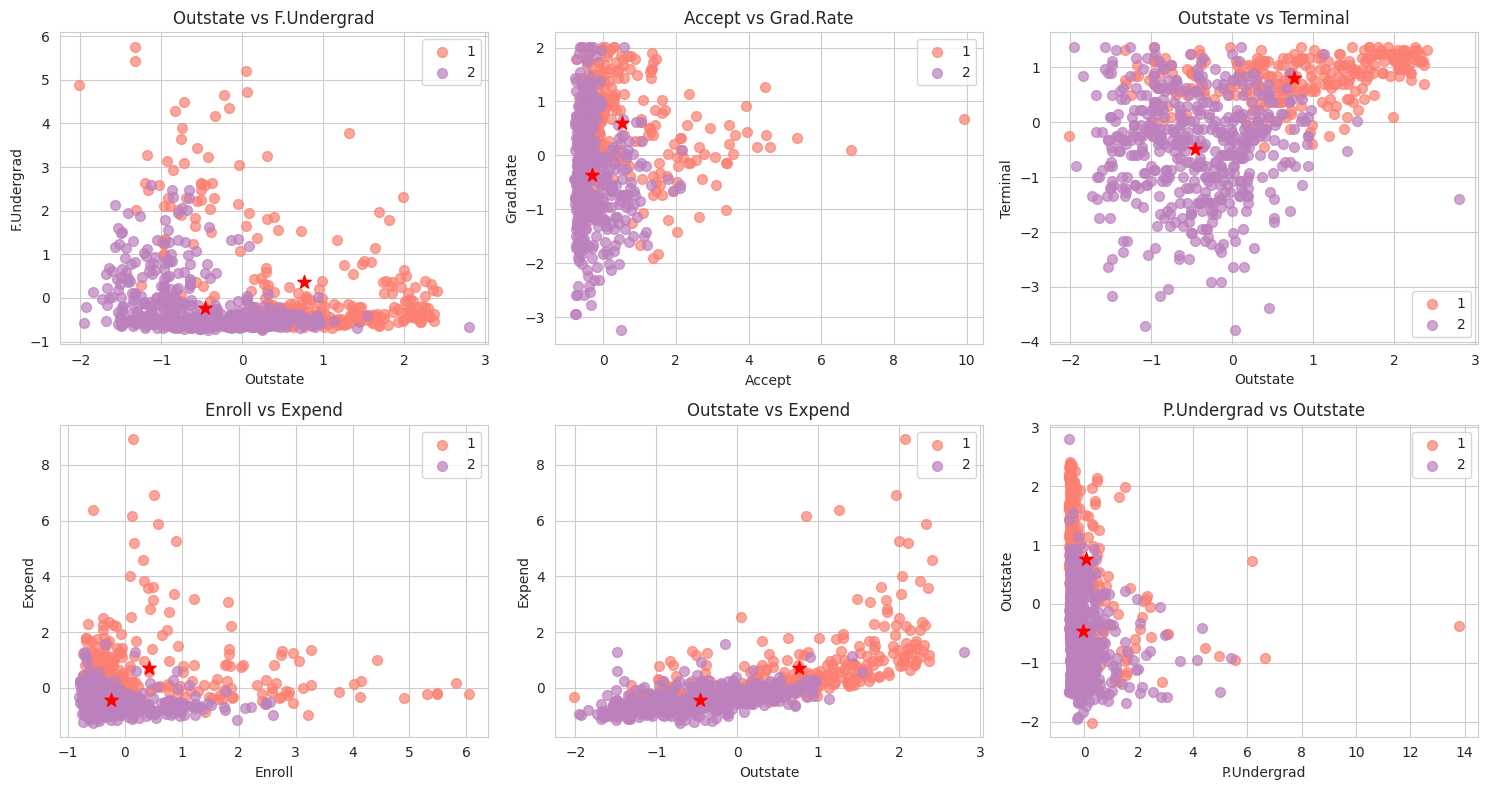

In [340]:
fig, axes = plt.subplots(2, 3, figsize=(15,8))

display_by_feature(axes[0][0], X, kmeans2, 7, 5)
display_by_feature(axes[0][1], X, kmeans2, 1, 16)
display_by_feature(axes[0][2], X, kmeans2, 7, 12)
display_by_feature(axes[1][0], X, kmeans2, 2, 15)
display_by_feature(axes[1][1], X, kmeans2, 7, 15)
display_by_feature(axes[1][2], X, kmeans2, 6, 7)

fig.tight_layout()
plt.show()

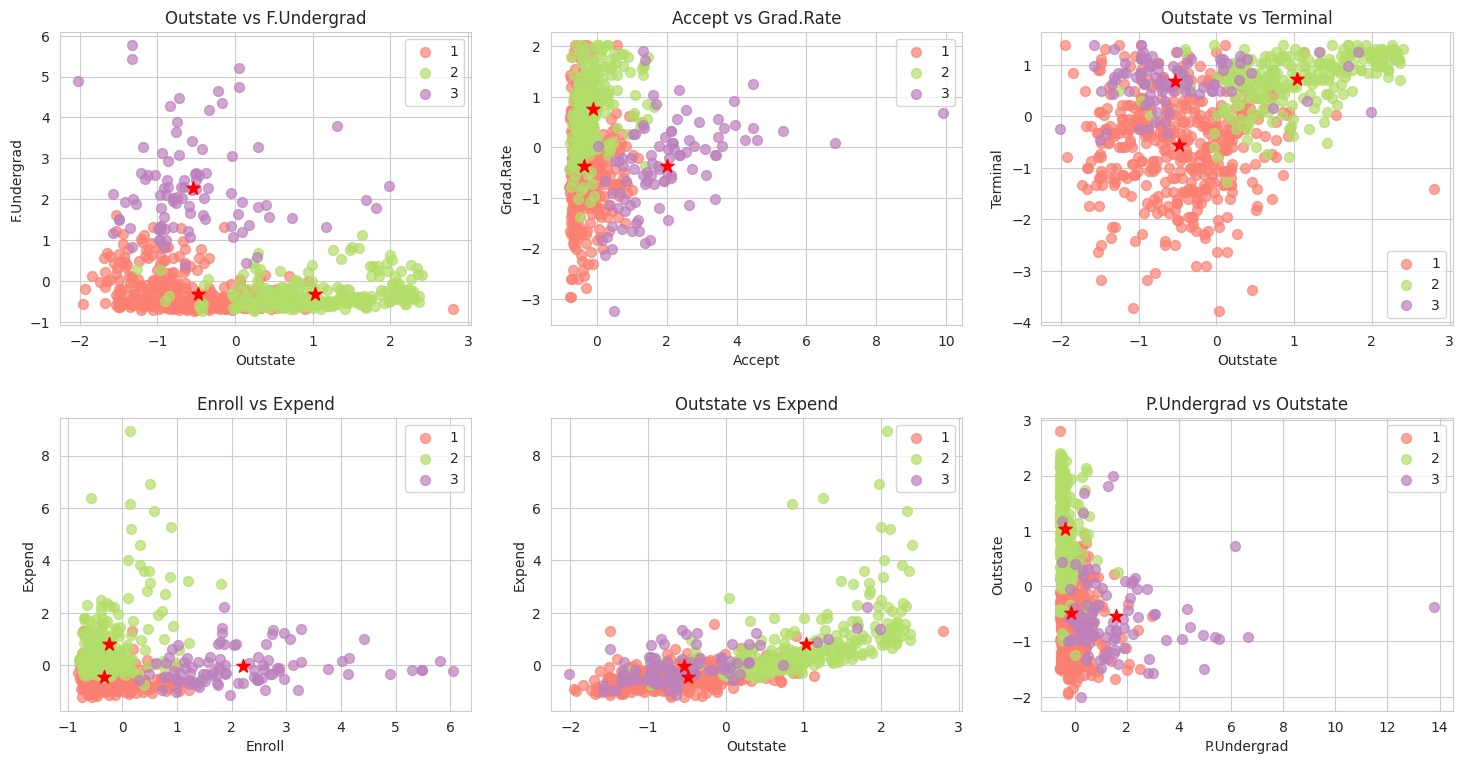

In [330]:
fig, axes = plt.subplots(2, 3, figsize=(15,8))

display_by_feature(axes[0][0], X, kmeans_best, 7, 5)
display_by_feature(axes[0][1], X, kmeans_best, 1, 16)
display_by_feature(axes[0][2], X, kmeans_best, 7, 12)
display_by_feature(axes[1][0], X, kmeans_best, 2, 15)
display_by_feature(axes[1][1], X, kmeans_best, 7, 15)
display_by_feature(axes[1][2], X, kmeans_best, 6, 7)

fig.tight_layout(pad=2.0)
plt.show()

## Report

### **1. Conclusion my findings:**
- Sau khi triển khai thuật toán Custom KMeans Clustering trên tập dữ liệu và tiến hành so sánh với Sklearn KMeans Clustering. Thuật toán custom được thiết lập đúng!
- Kết quả phân cụm tốt nhất đựo thực hiện khi số cụm K = 3.
- Triển khai phân cụm với K = 2, thuật toán KMeans vẫn thực hiện tốt việc chia tệp dữ liệu thành 2 cụm riêng biệt. Tuy nhiên, khi so sánh với ground truth labels có chút khác biệt do bị phụ thuộc hạn chế của KMeans.
- Khám phá cấu trúc dữ liệu thông qua KMeans cho thấy, với các features đầu vào của tập dữ liệu. Chúng ta nên xem xét chia các trường đại học vào các nhóm khác nhau theo tiêu chí khác.

### **2. Methodology:**
#### 2.1 Data Preprocesing:
- Checking missing values: Không có missing values.
- Adjust Error Data: điều chỉnh các tỷ lệ phần trăm sai.
- Scaling data: dùng StandardScaler để chuẩn hoá dữ liệu đầu vào về cùng khoảng giá trị.
- Encode categorical variables: gắn nhãn cho cột Private với Yes: 1, No: 0 tương ứng 1: Private Uni, 0: Public Uni.

#### 2.2 Implement KMeans:
- Thiết lập thuật toán KMeans dựa trên lý thuyết nguyên tắc hoạt động của thuật toán:
  1. Init K-centroids.
  2. Calculate distances of data point to centroid.
  3. Assign label of data points.
  This index is the label cluster of data point.
  4. Update centroids.
  5. Calculate WCVs (Within Cluster Variance).
  6. Check convergence.
- Kiểm tra thuật toán đã được thiết lập đúng bằng cách so sánh với Sklearn KMeans. Tính toán ARI và trực quan hoá theo PCA.


#### 2.3 Evaluate the KMeans Clustering technique on the data set by gound truth label (Private):
- Đánh giá thông qua việc giảm chiều và lượng thông tin giữ lại: dùng explain_variance_ratio để xem tỷ lệ biến thiên được giải thích bởi hệ principal components mới.
- Đánh giá thông qua hiệu suất mô hình học máy: dùng evaluate metrics: MSE, r2_scores để đánh giá và giải thích.

#### 2.4 Explore structure of data by KMeans:
- Trực quan quan sát sự phân chia cụm dựa vào các đặc trưng để hiểu về cấu trúc dữ liệu.

### **3. Insights gained from the assignment:**
- Insight 1: Phải chuẩn bị dữ liệu kĩ trước khi sử dụng KMeans, vì KMeans nhạy cảm với các khoảng giá trị và các điểm ngoại lai.
- Insight 2: Thứ tự các cụm khi sử dụng KMeans bị thay đổi do tính random centroids của thuật toán. Do đó, cần biết để chọn phương pháp đánh giá khi thực hiện so sánh với ground truth.
- Insight 3: Việc quyết định chia bao nhiêu cụm (K) tuỳ thuộc vào tiêu chí chia cụm và dữ liệu đầu vào. Cần xem xét kĩ lưỡng liệu nên chia dữ liệu thành mấy cụm để phù hợp với dữ liệu đầu vào và tiêu chí chia cụm.

Tóm lại, K-Means Clustering là một thuật toán học máy không giám sát, thường được sử dụng để phân tích cụm trong dữ liệu. Mục tiêu chính của thuật toán này là phân chia một tập dữ liệu thành K cụm sao cho các điểm dữ liệu trong cùng một cụm có tính tương đồng cao nhất có thể, trong khi các điểm dữ liệu ở các cụm khác nhau có sự khác biệt rõ ràng. Với khả năng ứng dụng rộng rãi và hiệu quả cao, nó đóng một vai trò quan trọng trong việc trích xuất thông tin có ý nghĩa từ dữ liệu và hỗ trợ trong việc ra quyết định. Tuy nhiên, để tận dụng tối đa thuật toán này, người dùng cần phải hiểu rõ về các hạn chế của nó và áp dụng các kỹ thuật tối ưu hóa phù hợp.